# Import Library and Dataset

In [9]:
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [2]:
# Helper Function
def import_from_gdrive(id_file, file_name, sheet_name=None):
    link = 'https://drive.google.com/uc?id=' + id_file
    output_file = '/content/' + file_name
    gdown.download(link, output_file, quiet=False)

    df = pd.read_excel(output_file)
    return df

In [3]:
id_file = '1iNMFgJmFTkSWK9VnMf_uhlKYYmNclJNm'
df = import_from_gdrive(id_file,'final_dataset_converted_rupiah.xlsx')

Downloading...
From: https://drive.google.com/uc?id=1iNMFgJmFTkSWK9VnMf_uhlKYYmNclJNm
To: /content/final_dataset_converted_rupiah.xlsx
100%|██████████| 15.1M/15.1M [00:00<00:00, 38.6MB/s]


# Select Training Column

In [13]:
fix_columns =['Total Household Income',
              'Household Head Sex',
              'Household Head Age',
              'Household Head Marital Status',
              # 'Household Head Highest Grade Completed',
              'Household Head Highest Grade Completed (Simplified)',
              'Total Household Income',
              'Region',
              'Type of Building/House',
              'House Floor Area',
              'Number of bedrooms',
              'Electricity',
              'Tenure Status',
              'Type of Household',
              'Total Number of Family members',
              'Total number of family members employed',
              # 'Number of Car, Jeep, Van',
              # 'Number of Motorcycle/Tricycle',
              # 'Number of Television',
              # 'Number of Airconditioner',
              # 'Number of Personal Computer',
              # 'Number of Cellular phone',
              # 'Number of Refrigerator/Freezer',
              # 'Number of Washing Machine',
              'Number of Kids',
              'Number of Vehicles',
              'Number of Communication Devices',
              'Number of Electronics',
              ]
X =  df.loc[:, fix_columns]
X =  X.loc[:,~X.columns.duplicated()]

# Mengubah tipe data int menjadi float
int_columns = X.select_dtypes(include=['int32', 'int64']).columns
X[int_columns] = X[int_columns].astype('float64')

y = df['Total Expenses Category']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34008 entries, 0 to 34007
Data columns (total 18 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Total Household Income                               34008 non-null  float64
 1   Household Head Sex                                   34008 non-null  object 
 2   Household Head Age                                   34008 non-null  float64
 3   Household Head Marital Status                        34008 non-null  object 
 4   Household Head Highest Grade Completed (Simplified)  33999 non-null  object 
 5   Region                                               34008 non-null  object 
 6   Type of Building/House                               34008 non-null  object 
 7   House Floor Area                                     34008 non-null  float64
 8   Number of bedrooms                                   34008 non-nul

## Multiclass Clasification Model

In [10]:
# numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# # Pipeline preprocessing untuk fitur numerik
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())  # Standarisasi
# ])
# # Pipeline preprocessing untuk fitur kategorikal
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder())  # One-hot encoding
# ])

# # Gabungkan pipeline preprocessing untuk fitur numerik dan kategorikal
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# X = preprocessor.fit_transform(X)

In [14]:
TEST_SIZE = 0.2
RANDOM_STATE = 42
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
n_cols = X_train.shape[1]

print("X_train shape : " , X_train.shape)
print("y_train shape : " , y_train.shape)
print("X_test  shape : " , X_test.shape)
print("y_test  shape : " , y_test.shape)

X_train shape :  (27206, 18)
y_train shape :  (27206,)
X_test  shape :  (6802, 18)
y_test  shape :  (6802,)


In [15]:
# One-Hot Encoding untuk kolom kategorikal
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
X_train = pd.get_dummies(X_train, columns=categorical_columns)
X_test = pd.get_dummies(X_test, columns=categorical_columns)

# Pastikan kolom yang ada di X_train dan X_test sama setelah one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Standarisasi fitur numerik
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Mengubah semua data menjadi tipe float32
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

In [ ]:
# # Membangun Model Klasifikasi
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')  # Menggunakan sigmoid untuk binary classification
# ])

# # Kompilasi model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Melatih model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluasi model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Loss: {loss}, Accuracy: {accuracy}')

In [16]:
# mlp for the blobs multi-class classification problem with cross-entropy loss
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
from tensorflow.keras.callbacks import History

In [18]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding

# Create a mapping from category labels to numerical labels
label_mapping = {'Category 1': 0, 'Category 2': 1, 'Category 3': 2, 'Category 4': 3}

# Convert category labels to numerical labels
y_train_numeric = np.array([label_mapping[label] for label in y_train])
y_test_numeric = np.array([label_mapping[label] for label in y_test])

# Convert numerical labels to one-hot encoding
y_train_encoded = to_categorical(y_train_numeric)
y_test_encoded = to_categorical(y_test_numeric)

In [20]:
# define model

# Dapatkan jumlah kolom dalam X_train
num_columns = X_train.shape[1]
model_1 = Sequential()
model_1.add(Dense(100, input_dim=num_columns, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dense(4, activation='softmax'))

# compile model
opt = adam(learning_rate=0.01, momentum=0.9)
model_1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
# create an instance of History callback
history_callback = History()
history_callback = model_1.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=100, verbose=0)

# access the history object
history_dict = history_callback.history

# print history for each epoch
for epoch in range(len(history_dict['loss'])):
    print(f'Epoch {epoch+1}/{len(history_dict["loss"])} - Loss: {history_dict["loss"][epoch]} - Accuracy: {history_dict["accuracy"][epoch]} - Val Loss: {history_dict["val_loss"][epoch]} - Val Accuracy: {history_dict["val_accuracy"][epoch]}')

# evaluate the model
_, train_acc = model_1.evaluate(X_train, y_train_encoded, verbose=0)
_, test_acc = model_1.evaluate(X_test, y_test_encoded, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/100 - Loss: 0.8072234392166138 - Accuracy: 0.6360729336738586 - Val Loss: 0.7552081346511841 - Val Accuracy: 0.6502498984336853
Epoch 2/100 - Loss: 0.6879317760467529 - Accuracy: 0.6988164186477661 - Val Loss: 0.6913244128227234 - Val Accuracy: 0.7014113664627075
Epoch 3/100 - Loss: 0.6716822981834412 - Accuracy: 0.7071601748466492 - Val Loss: 0.6866580843925476 - Val Accuracy: 0.7005292773246765
Epoch 4/100 - Loss: 0.6623319983482361 - Accuracy: 0.7129677534103394 - Val Loss: 0.6834883689880371 - Val Accuracy: 0.6981769800186157
Epoch 5/100 - Loss: 0.653386116027832 - Accuracy: 0.7152833938598633 - Val Loss: 0.6791446805000305 - Val Accuracy: 0.7025874853134155
Epoch 6/100 - Loss: 0.6465820074081421 - Accuracy: 0.7205763459205627 - Val Loss: 0.6801654696464539 - Val Accuracy: 0.6971479058265686
Epoch 7/100 - Loss: 0.6420395970344543 - Accuracy: 0.7213114500045776 - Val Loss: 0.66696697473526 - Val Accuracy: 0.7036165595054626
Epoch 8/100 - Loss: 0.6389238834381104 - Accuracy: 

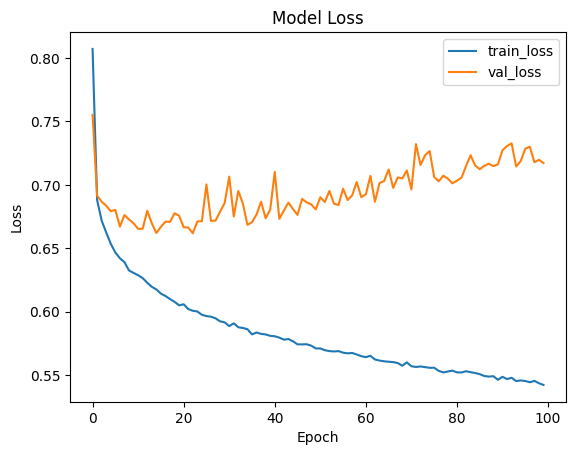

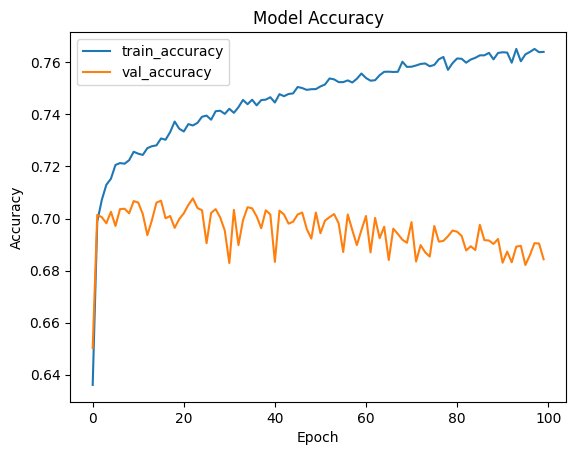

In [23]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_dict['loss'], label='train_loss')
plt.plot(history_dict['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_dict['accuracy'], label='train_accuracy')
plt.plot(history_dict['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


213/213 [==============================] - 1s 2ms/step


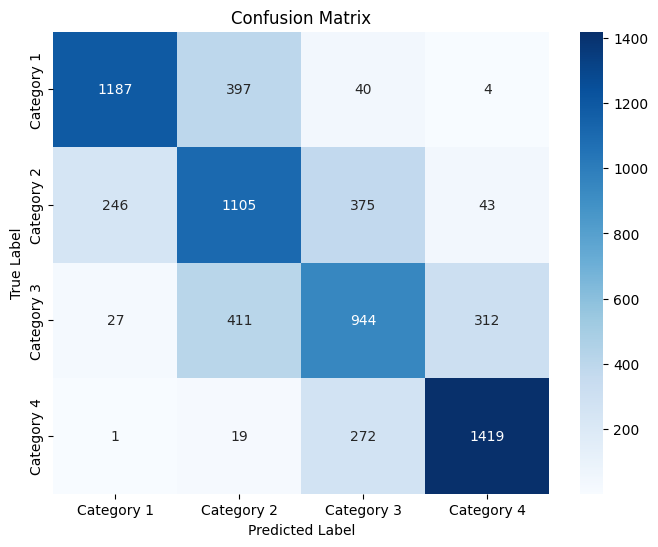

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict probabilities for test set
y_pred_probs = model_1.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict labels for training set
y_train_pred_probs = model_1.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

# Calculate accuracy for training set
train_accuracy = accuracy_score(np.argmax(y_train_encoded, axis=1), y_train_pred)

# Calculate precision for training set
train_precision = precision_score(np.argmax(y_train_encoded, axis=1), y_train_pred, average='weighted')

# Calculate recall for training set
train_recall = recall_score(np.argmax(y_train_encoded, axis=1), y_train_pred, average='weighted')

# Calculate F1-score for training set
train_f1 = f1_score(np.argmax(y_train_encoded, axis=1), y_train_pred, average='weighted')

# Print evaluation metrics for training set
print('Training')
print(f'Training Accuracy: {train_accuracy}')
print(f'Training Precision: {train_precision}')
print(f'Training Recall: {train_recall}')
print(f'Training F1-score: {train_f1}')


851/851 [==============================] - 2s 2ms/step
Training Accuracy: 0.7739469234727634
Training Precision: 0.7794108491715865
Training Recall: 0.7739469234727634
Training F1-score: 0.7743608980196404


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_encoded, axis=1), y_pred)

# Calculate precision
precision = precision_score(np.argmax(y_test_encoded, axis=1), y_pred, average='weighted')

# Calculate recall
recall = recall_score(np.argmax(y_test_encoded, axis=1), y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(np.argmax(y_test_encoded, axis=1), y_pred, average='weighted')

# Print evaluation metrics
print('Testing')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.6843575418994413
Precision: 0.6880983197656342
Recall: 0.6843575418994413
F1-score: 0.6852606486066682
